1. Data Preprocessing

In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
#Load csv file
df = pd.read_csv('/Users/houhiroshisakai/Desktop/Schulich/Term 2/MBAN 6120/Customer_Data.csv')

In [3]:
#Review the data info check if there is null value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
#Drop null value (less than 10%)
df.dropna(inplace=True)

In [5]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,C19184,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8636 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8636 non-null   object 
 1   BALANCE                           8636 non-null   float64
 2   BALANCE_FREQUENCY                 8636 non-null   float64
 3   PURCHASES                         8636 non-null   float64
 4   ONEOFF_PURCHASES                  8636 non-null   float64
 5   INSTALLMENTS_PURCHASES            8636 non-null   float64
 6   CASH_ADVANCE                      8636 non-null   float64
 7   PURCHASES_FREQUENCY               8636 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 11  CASH_ADVANCE_TRX                  8636 non-null   int64  
 12  PURCHASES_T

In [7]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,2095.571300,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,12.000000
50%,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
75%,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [8]:
#Drop duplicate
df.drop_duplicates(inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8636 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8636 non-null   object 
 1   BALANCE                           8636 non-null   float64
 2   BALANCE_FREQUENCY                 8636 non-null   float64
 3   PURCHASES                         8636 non-null   float64
 4   ONEOFF_PURCHASES                  8636 non-null   float64
 5   INSTALLMENTS_PURCHASES            8636 non-null   float64
 6   CASH_ADVANCE                      8636 non-null   float64
 7   PURCHASES_FREQUENCY               8636 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 11  CASH_ADVANCE_TRX                  8636 non-null   int64  
 12  PURCHASES_T

In [10]:
df.drop('CUST_ID', axis = 1, inplace=True)

In [11]:
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [12]:
scaler = StandardScaler()
df_std = scaler.fit_transform(df)

In [13]:
# Perform PCA
pca = PCA()
df_pca = pca.fit_transform(df_std)

In [14]:
# Convert it into a dataframe
df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(len(df.columns))])

# Print the explained variance ratio
print('Explained variance ratio:', pca.explained_variance_ratio_)

# Print the cumulative explained variance ratio
cumsum_variance = np.cumsum(pca.explained_variance_ratio_)
print('Cumulative explained variance ratio:', cumsum_variance)

# Show the transformed dataframe
df_pca.head()

Explained variance ratio: [2.72311770e-01 2.03743076e-01 8.91833372e-02 7.57360860e-02
 6.27661816e-02 5.71278613e-02 4.91618788e-02 4.21073427e-02
 3.68169669e-02 3.08150790e-02 2.36380362e-02 1.77453962e-02
 1.42671026e-02 1.17865972e-02 1.00809717e-02 2.71162672e-03
 6.90045972e-07]
Cumulative explained variance ratio: [0.27231177 0.47605485 0.56523818 0.64097427 0.70374045 0.76086831
 0.81003019 0.85213753 0.8889545  0.91976958 0.94340762 0.96115301
 0.97542011 0.98720671 0.99728768 0.99999931 1.        ]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
0,-1.696395,-1.122584,0.491562,0.719521,0.079830,0.118234,0.808993,-0.093970,-0.016190,-0.082402,-0.216529,-0.053144,-0.073513,-0.197110,0.137454,0.046683,-0.000168
1,-1.215681,2.435638,0.694658,-0.098843,0.803019,-0.917777,-0.322969,-0.045119,0.754617,-0.748468,-0.878351,-0.592741,-0.055471,-0.696165,-0.558965,-0.085698,0.000007
2,0.935853,-0.385202,-0.025953,1.293844,-1.987285,-0.682139,-1.624721,0.073401,-0.837066,-0.034854,-0.746798,0.695779,0.685713,0.008418,0.221006,0.516991,0.000021
3,-1.614638,-0.724586,0.272358,1.086116,-0.427814,0.082982,0.687001,0.063548,0.566940,-0.083532,-0.466749,-0.119286,-0.031707,-0.051778,0.290624,-0.071753,-0.000074
4,0.223701,-0.783610,-1.184434,0.721353,0.801243,0.525879,0.788893,-0.089942,0.365857,-0.192647,-0.194651,0.332570,0.491517,-0.082598,0.163826,0.131205,-0.000344


In [15]:
#Define pc as 90%
pca = PCA(n_components=0.9)
df_pca = pca.fit_transform(df_pca)

In [16]:
correlation_matrix = df.corr()
correlation_matrix

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.310140,0.176083,0.159985,0.122109,0.495586,-0.088459,0.063832,-0.069582,0.445307,0.382388,0.147887,0.535518,0.322830,0.398669,-0.333594,0.066987
BALANCE_FREQUENCY,0.310140,1.000000,0.122635,0.095254,0.114739,0.089036,0.228158,0.187467,0.184159,0.181132,0.133265,0.183095,0.087682,0.039169,0.132519,-0.156961,0.104714
PURCHASES,0.176083,0.122635,1.000000,0.916780,0.679259,-0.053760,0.393000,0.497384,0.316025,-0.124863,-0.070277,0.688732,0.358425,0.606782,0.093842,0.176447,0.084545
ONEOFF_PURCHASES,0.159985,0.095254,0.916780,1.000000,0.329650,-0.033244,0.265460,0.524514,0.128380,-0.086413,-0.048705,0.545313,0.320613,0.570850,0.048741,0.129890,0.063400
INSTALLMENTS_PURCHASES,0.122109,0.114739,0.679259,0.329650,1.000000,-0.066099,0.441193,0.211829,0.511130,-0.136455,-0.076716,0.626083,0.258057,0.385391,0.132156,0.178440,0.083346
CASH_ADVANCE,0.495586,0.089036,-0.053760,-0.033244,-0.066099,1.000000,-0.218566,-0.090111,-0.178873,0.629030,0.656911,-0.078449,0.304161,0.459342,0.140094,-0.158566,-0.073090
PURCHASES_FREQUENCY,-0.088459,0.228158,0.393000,0.265460,0.441193,-0.218566,1.000000,0.502123,0.862338,-0.316771,-0.208749,0.567168,0.121372,0.100715,0.002979,0.305393,0.052161
ONEOFF_PURCHASES_FREQUENCY,0.063832,0.187467,0.497384,0.524514,0.211829,-0.090111,0.502123,1.000000,0.143911,-0.118225,-0.073384,0.544364,0.295432,0.244346,-0.030357,0.154073,0.080437
PURCHASES_INSTALLMENTS_FREQUENCY,-0.069582,0.184159,0.316025,0.128380,0.511130,-0.178873,0.862338,0.143911,1.000000,-0.268924,-0.172811,0.529192,0.063421,0.083424,0.030036,0.249547,0.065779
CASH_ADVANCE_FREQUENCY,0.445307,0.181132,-0.124863,-0.086413,-0.136455,0.629030,-0.316771,-0.118225,-0.268924,1.000000,0.799593,-0.136913,0.132841,0.182340,0.098844,-0.260001,-0.140038


In [17]:
correlation_matrix

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.310140,0.176083,0.159985,0.122109,0.495586,-0.088459,0.063832,-0.069582,0.445307,0.382388,0.147887,0.535518,0.322830,0.398669,-0.333594,0.066987
BALANCE_FREQUENCY,0.310140,1.000000,0.122635,0.095254,0.114739,0.089036,0.228158,0.187467,0.184159,0.181132,0.133265,0.183095,0.087682,0.039169,0.132519,-0.156961,0.104714
PURCHASES,0.176083,0.122635,1.000000,0.916780,0.679259,-0.053760,0.393000,0.497384,0.316025,-0.124863,-0.070277,0.688732,0.358425,0.606782,0.093842,0.176447,0.084545
ONEOFF_PURCHASES,0.159985,0.095254,0.916780,1.000000,0.329650,-0.033244,0.265460,0.524514,0.128380,-0.086413,-0.048705,0.545313,0.320613,0.570850,0.048741,0.129890,0.063400
INSTALLMENTS_PURCHASES,0.122109,0.114739,0.679259,0.329650,1.000000,-0.066099,0.441193,0.211829,0.511130,-0.136455,-0.076716,0.626083,0.258057,0.385391,0.132156,0.178440,0.083346
CASH_ADVANCE,0.495586,0.089036,-0.053760,-0.033244,-0.066099,1.000000,-0.218566,-0.090111,-0.178873,0.629030,0.656911,-0.078449,0.304161,0.459342,0.140094,-0.158566,-0.073090
PURCHASES_FREQUENCY,-0.088459,0.228158,0.393000,0.265460,0.441193,-0.218566,1.000000,0.502123,0.862338,-0.316771,-0.208749,0.567168,0.121372,0.100715,0.002979,0.305393,0.052161
ONEOFF_PURCHASES_FREQUENCY,0.063832,0.187467,0.497384,0.524514,0.211829,-0.090111,0.502123,1.000000,0.143911,-0.118225,-0.073384,0.544364,0.295432,0.244346,-0.030357,0.154073,0.080437
PURCHASES_INSTALLMENTS_FREQUENCY,-0.069582,0.184159,0.316025,0.128380,0.511130,-0.178873,0.862338,0.143911,1.000000,-0.268924,-0.172811,0.529192,0.063421,0.083424,0.030036,0.249547,0.065779
CASH_ADVANCE_FREQUENCY,0.445307,0.181132,-0.124863,-0.086413,-0.136455,0.629030,-0.316771,-0.118225,-0.268924,1.000000,0.799593,-0.136913,0.132841,0.182340,0.098844,-0.260001,-0.140038


2. EDA

<Axes: >

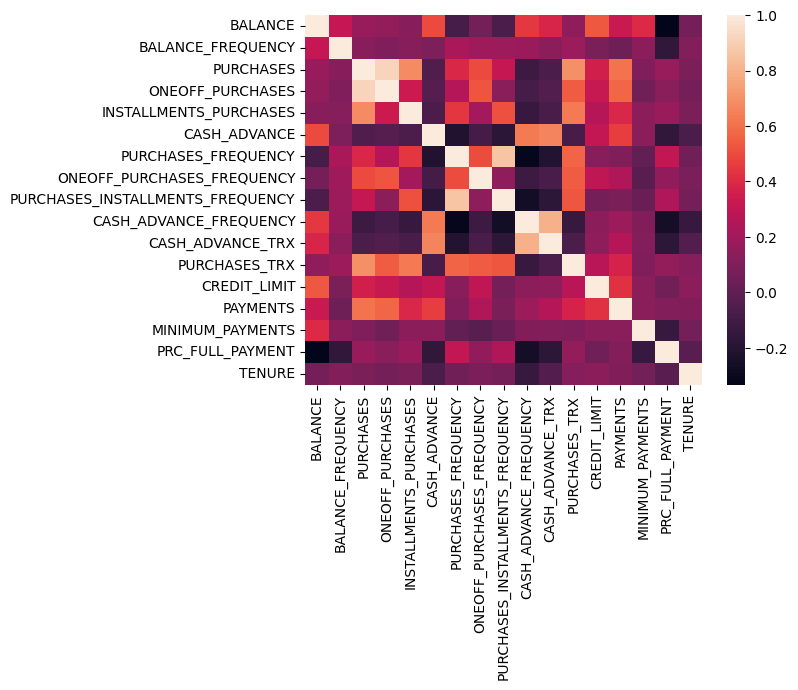

In [18]:
#Build heatmap of correlation matrix to understand the relationship of each feature
sns.heatmap(correlation_matrix)

Based on the heatmap, I can get that Purchase has positive correlations with Oneff purchase, Installment purchase, and Purchases frequence, which means when purchase increase, one of them will increase as well.

Additionally, cash_advance influences its frequency and trx because they are positive correlations; also, customers, who have high credit limit, may do great transactions.

Other than that, purchase frequency is high means the customer may have high purchase intallment frequency.


<Axes: xlabel='PURCHASES', ylabel='Count'>

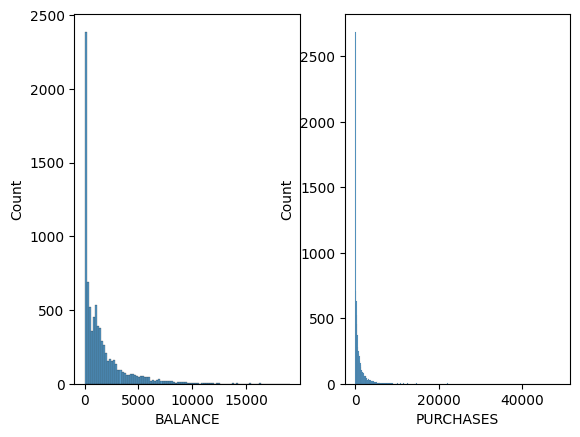

In [19]:
#Understand the spending and debt levels of customers.
fig, ((ax1,ax2)) = plt.subplots(1,2)
sns.histplot(df['BALANCE'], ax = ax1)
sns.histplot(df['PURCHASES'], ax = ax2)

<Axes: ylabel='CASH_ADVANCE_FREQUENCY'>

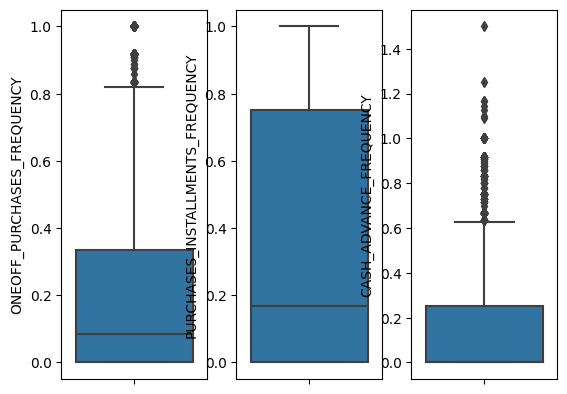

In [20]:
#Understanding the frequency of customers purchasing 
fig, ((ax1,ax2,ax3)) = plt.subplots(1,3)
sns.boxplot(y = 'ONEOFF_PURCHASES_FREQUENCY', ax = ax1, data = df)
sns.boxplot(y = 'PURCHASES_INSTALLMENTS_FREQUENCY', ax = ax2, data = df)
sns.boxplot(y = 'CASH_ADVANCE_FREQUENCY', ax = ax3, data = df)


<Axes: xlabel='CREDIT_LIMIT', ylabel='PAYMENTS'>

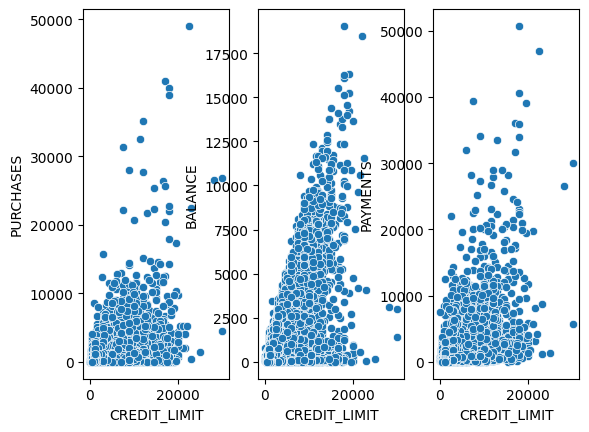

In [21]:
#Analyzing if the credit limit is related with purchases/balance/payments
fig, ((ax1,ax2,ax3)) = plt.subplots(1,3)
sns.scatterplot(x = 'CREDIT_LIMIT',y = 'PURCHASES', ax = ax1, data = df)
sns.scatterplot(x = 'CREDIT_LIMIT', y = 'BALANCE', ax = ax2, data = df)
sns.scatterplot(x = 'CREDIT_LIMIT',y = 'PAYMENTS', ax = ax3, data = df)

As the credit limit goes up, the purchase increases as well, but most of purchases are concentrated below 10,000. Therefore, Credit limit doesn't impact on purchase. Furthermore, it is more concentrated when credit limit is getting higher.
The last scatterplot shows the payment is increasing when credit limit is going up.

3. Clustering Algorithms

/Users/houhiroshisakai/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/houhiroshisakai/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/houhiroshisakai/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/houhiroshisakai/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

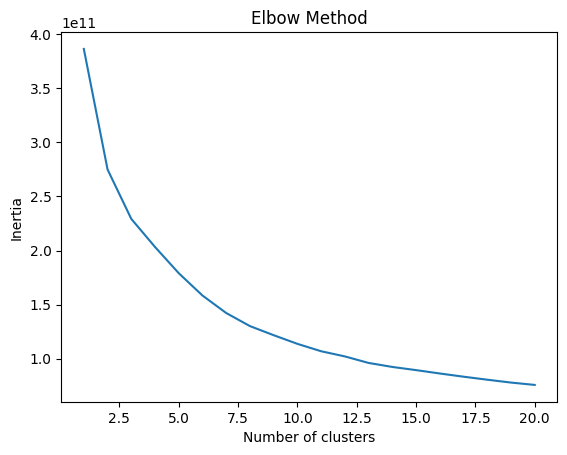

In [22]:
#Using the clustering with the original data without pca
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow Method
inertia = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 21), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


It is hard to determine which number of clusters are the best one, so we need to grab it by calculating silhouette score for each number of clusters.

In [23]:
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm
# Silhouette Score
for i in range(2,20):
    #Initialize the cluster with n_cluster and a random generators
    cluster = KMeans(n_clusters=i, random_state= 10)
    cluster_labels = cluster.fit_predict(df)

    silhouette_avg = silhouette_score(df, cluster_labels)
    print('n_cluster: ', i , 'Avg Silhouette Score: ', silhouette_avg)

/Users/houhiroshisakai/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


n_cluster:  2 Avg Silhouette Score:  0.511307699456009


/Users/houhiroshisakai/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


n_cluster:  3 Avg Silhouette Score:  0.4645690623243453


/Users/houhiroshisakai/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


n_cluster:  4 Avg Silhouette Score:  0.3896747465983954


/Users/houhiroshisakai/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


n_cluster:  5 Avg Silhouette Score:  0.3924095800836532


/Users/houhiroshisakai/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


n_cluster:  6 Avg Silhouette Score:  0.3700010011471749


/Users/houhiroshisakai/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


n_cluster:  7 Avg Silhouette Score:  0.384092659097639


/Users/houhiroshisakai/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


n_cluster:  8 Avg Silhouette Score:  0.3826572469801026


/Users/houhiroshisakai/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


n_cluster:  9 Avg Silhouette Score:  0.3527209902673182


/Users/houhiroshisakai/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


n_cluster:  10 Avg Silhouette Score:  0.35879051874318724


/Users/houhiroshisakai/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


n_cluster:  11 Avg Silhouette Score:  0.3574371105976952


/Users/houhiroshisakai/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


n_cluster:  12 Avg Silhouette Score:  0.3620709752289763


/Users/houhiroshisakai/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


n_cluster:  13 Avg Silhouette Score:  0.29144511854732574


/Users/houhiroshisakai/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


n_cluster:  14 Avg Silhouette Score:  0.26353205799721097


/Users/houhiroshisakai/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


n_cluster:  15 Avg Silhouette Score:  0.2978756368704574


/Users/houhiroshisakai/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


n_cluster:  16 Avg Silhouette Score:  0.2792879945457898


/Users/houhiroshisakai/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


n_cluster:  17 Avg Silhouette Score:  0.26827334719178453


/Users/houhiroshisakai/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


n_cluster:  18 Avg Silhouette Score:  0.3027094649366628


/Users/houhiroshisakai/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


n_cluster:  19 Avg Silhouette Score:  0.24358854926047815


When n_cluster equals 2, it has the highest silhouette score.

/Users/houhiroshisakai/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


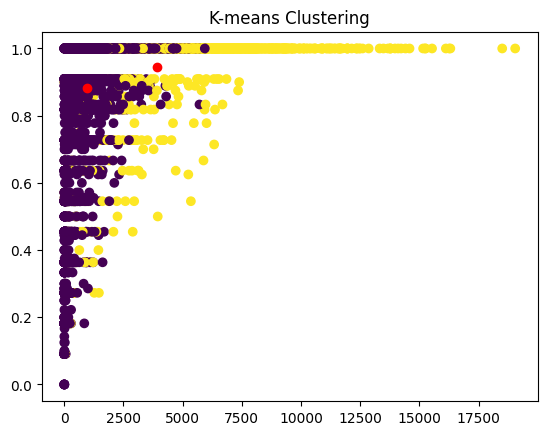

In [24]:
#Applying KMeans with 2 clusters
kmeans = KMeans(n_clusters = 2)
kmeans.fit(df)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Plotting
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], c='red')
plt.title('K-means Clustering')
plt.show()


/Users/houhiroshisakai/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/houhiroshisakai/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/houhiroshisakai/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/houhiroshisakai/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

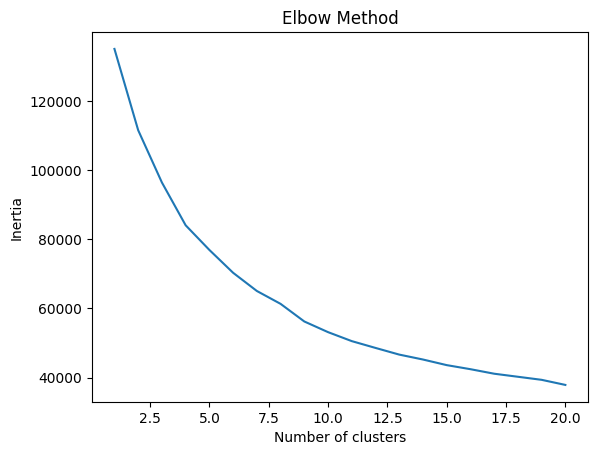

In [25]:
# Using the clustering with the data which reduce dimensionality by pca
inertia = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 21), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


Based on the result of Elbow Method, it is hard to figure out which number of clusters are the best to do the cluster; therefore, using silihouette score to find the best number of clusters should be a better way.

In [26]:
# Silhouette Score
for i in range(2,20):
    #Initialize the cluster with n_cluster and a random generators
    cluster = KMeans(n_clusters=i, random_state= 10)
    cluster_labels = cluster.fit_predict(df_pca)

    #Looking for the number of clusters which has the best Silhouette Score
    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    print('n_cluster: ', i , 'Avg Silhouette Score: ', silhouette_avg)

/Users/houhiroshisakai/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


n_cluster:  2 Avg Silhouette Score:  0.22349765861089246


/Users/houhiroshisakai/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


n_cluster:  3 Avg Silhouette Score:  0.25737118129995395


/Users/houhiroshisakai/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


n_cluster:  4 Avg Silhouette Score:  0.21915947017489673


/Users/houhiroshisakai/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


n_cluster:  5 Avg Silhouette Score:  0.20739127309668215


/Users/houhiroshisakai/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


n_cluster:  6 Avg Silhouette Score:  0.22805979200675505


/Users/houhiroshisakai/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


n_cluster:  7 Avg Silhouette Score:  0.24339915162850304


/Users/houhiroshisakai/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


n_cluster:  8 Avg Silhouette Score:  0.24953964310806062


/Users/houhiroshisakai/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


n_cluster:  9 Avg Silhouette Score:  0.254680031811201


/Users/houhiroshisakai/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


n_cluster:  10 Avg Silhouette Score:  0.24482332298829254


/Users/houhiroshisakai/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


n_cluster:  11 Avg Silhouette Score:  0.2398984518813457


/Users/houhiroshisakai/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


n_cluster:  12 Avg Silhouette Score:  0.23355702882604754


/Users/houhiroshisakai/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


n_cluster:  13 Avg Silhouette Score:  0.24026121373100945


/Users/houhiroshisakai/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


n_cluster:  14 Avg Silhouette Score:  0.2420753713929348


/Users/houhiroshisakai/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


n_cluster:  15 Avg Silhouette Score:  0.22108012918448272


/Users/houhiroshisakai/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


n_cluster:  16 Avg Silhouette Score:  0.22128981143682833


/Users/houhiroshisakai/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


n_cluster:  17 Avg Silhouette Score:  0.22498574777975813


/Users/houhiroshisakai/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


n_cluster:  18 Avg Silhouette Score:  0.22798042676224303


/Users/houhiroshisakai/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


n_cluster:  19 Avg Silhouette Score:  0.23080874261696216


Accoridng to the result of average silhouette scores, 3 will be the best number of clusters.

/Users/houhiroshisakai/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


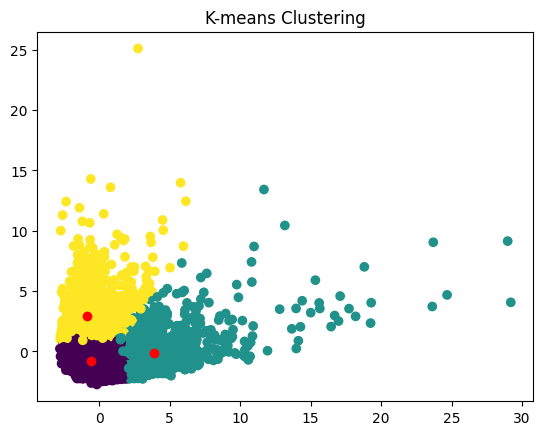

In [27]:
#Applying KMeans with 3 clusters
kmeans = KMeans(n_clusters = 3)
kmeans.fit(df_pca)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Plotting the clusters
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], c='red')
plt.title('K-means Clustering')
plt.show()


By comparing two sets of KMean clustering, the center of KMean is closed to their cluster after I used PCA. It means that KMeans can figure out their center of clusters after dimensionality reduction. Also, PCA successfully identify the change of data, so it caused clusters are significant. 

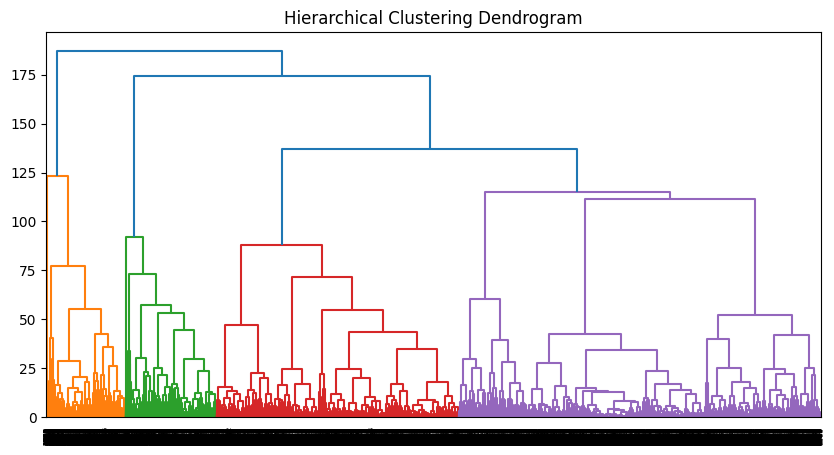

In [56]:
# Importing required libraries
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

# Generate linkage matrix
Z = linkage(df_pca, method='ward')

# Plotting
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()


In [57]:
#Calculate Silhouette Score
hc_labels = fcluster(Z, t=4, criterion='maxclust')
hier_sil_score = silhouette_score(df_pca, hc_labels)
hier_sil_score

0.1340707313248421

Affinity Propagation Silhouette Score: 0.14463128837028472


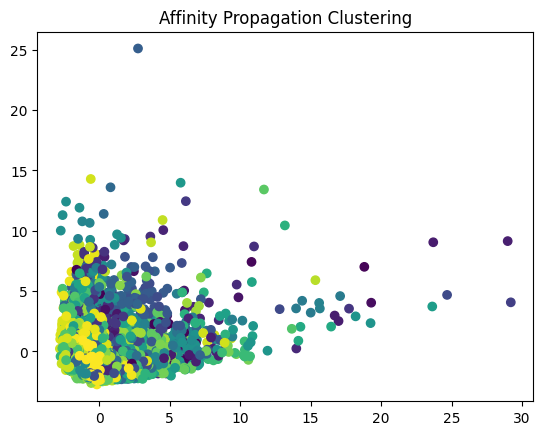

In [34]:
# Importing required library
from sklearn.cluster import AffinityPropagation

# Applying Affinity Propagation
af = AffinityPropagation(random_state=0)
af_labels = af.fit_predict(df_pca)

# Silhouette Score
af_sil_score = silhouette_score(df_pca, af_labels)
print(f"Affinity Propagation Silhouette Score: {af_sil_score}")

# Plotting
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=af_labels)
plt.title('Affinity Propagation Clustering')
plt.show()

Based on the sillhouette score of Affinity Propagation and the graph, the clusters are not significantly clear or some of clusters are probably similar. Moreover, the distribution of clusters is imbalance, so it would not be the appropriate method.

DBSCAN Silhouette Score: -0.4884319976266105


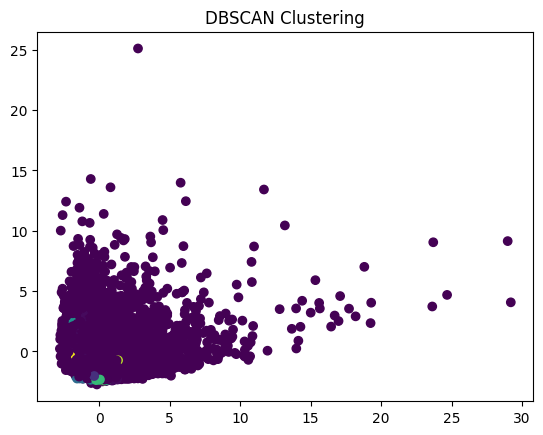

In [43]:
from sklearn.cluster import DBSCAN

# Applying DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_pca)

# Silhouette Score
if len(set(dbscan_labels)) > 1:
    dbscan_sil_score = silhouette_score(df_pca, dbscan_labels)
    print(f"DBSCAN Silhouette Score: {dbscan_sil_score}")

# Plotting
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=dbscan_labels)
plt.title('DBSCAN Clustering')
plt.show()

There are noise data points with DBSCAN Clustering, and the next step is to optimize the value of eps and min_samples

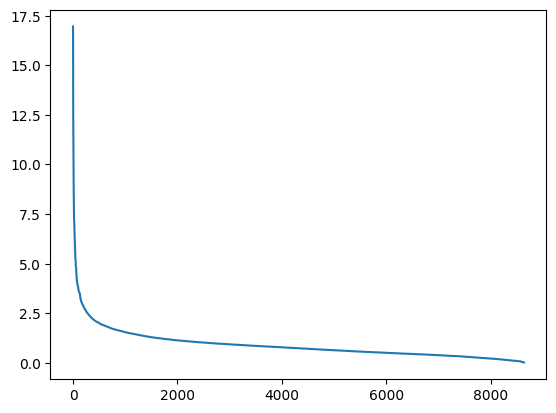

In [48]:
from sklearn.neighbors import NearestNeighbors
k = 5
nn = NearestNeighbors(n_neighbors=k)
nn.fit(df_pca)

#Return to distances and indices
distances, indices = nn.kneighbors(df_pca)

k_distance = sorted(distances[:,-1],reverse=True)
plt.plot(range(len(k_distance)), k_distance)
plt.show()

Since I cannot accrately get the optimal eps, so I decided to grab it by calculating the difference in distances and finding the point with the maximum increase

In [49]:
#Calculating the difference in distance
differences = np.diff(k_distance)

#Select the point with the maximum increase
optimal_index = np.argmax(differences)
optimal_eps = k_distance[optimal_index]
optimal_eps

5.003731466916574

In [53]:
for i in range(1,50):
    dbscan = DBSCAN(eps = optimal_eps, min_samples = i)
    dbscan_labels = dbscan.fit_predict(df_pca)
    n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
    n_noise = list(dbscan_labels).count(-1)

    print(f'min_samples: {i}, num clusters: {n_clusters}, noise points: {n_noise}')

min_samples: 1, num clusters: 25, noise points: 0
min_samples: 2, num clusters: 6, noise points: 19
min_samples: 3, num clusters: 2, noise points: 27
min_samples: 4, num clusters: 1, noise points: 32
min_samples: 5, num clusters: 1, noise points: 41
min_samples: 6, num clusters: 1, noise points: 42
min_samples: 7, num clusters: 1, noise points: 44
min_samples: 8, num clusters: 1, noise points: 45
min_samples: 9, num clusters: 1, noise points: 45
min_samples: 10, num clusters: 1, noise points: 47
min_samples: 11, num clusters: 1, noise points: 47
min_samples: 12, num clusters: 1, noise points: 47
min_samples: 13, num clusters: 1, noise points: 47
min_samples: 14, num clusters: 1, noise points: 48
min_samples: 15, num clusters: 1, noise points: 48
min_samples: 16, num clusters: 1, noise points: 48
min_samples: 17, num clusters: 1, noise points: 49
min_samples: 18, num clusters: 1, noise points: 51
min_samples: 19, num clusters: 1, noise points: 51
min_samples: 20, num clusters: 1, noise 

DBSCAN Silhouette Score: 0.7316182169561452


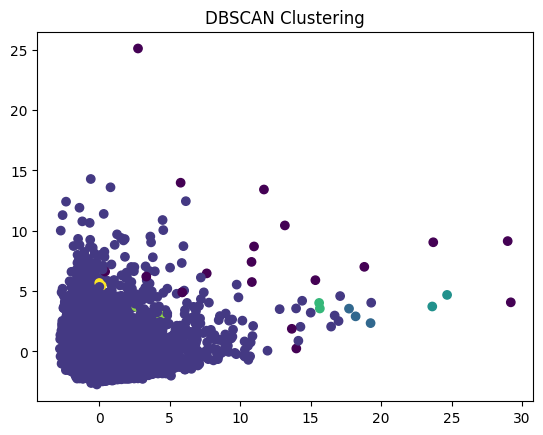

In [54]:
# Applying DBSCAN
dbscan = DBSCAN(eps=5, min_samples=2)
dbscan_labels = dbscan.fit_predict(df_pca)

# Silhouette Score
if len(set(dbscan_labels)) > 1:
    dbscan_sil_score = silhouette_score(df_pca, dbscan_labels)
    print(f"DBSCAN Silhouette Score: {dbscan_sil_score}")

# Plotting
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=dbscan_labels)
plt.title('DBSCAN Clustering')
plt.show()

The result of the revised DBSCAN clustering is good since the silhouette score is closed to 1 and there is a big cluster in the graph. Comparing the other three clustering method, it will be the most appropriate method to use.

4. Interpreting Clusters

In [59]:
df['Cluster_DBSCAN'] = dbscan_labels

In [62]:
df['Cluster_DBSCAN'].unique()

array([ 0, -1,  1,  2,  3,  4,  5])

In [64]:
df.groupby('Cluster_DBSCAN').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Cluster_DBSCAN,,,,,,,,,,,,,,,,,
-1,8250.006080,0.933014,16706.083158,11057.545263,5648.537895,7441.741738,0.784689,0.492026,0.648325,0.308612,16.842105,104.526316,16268.421053,24293.396699,13924.289402,0.214912,11.631579
0,1581.283352,0.894829,969.895120,568.759551,401.447749,980.258604,0.494962,0.205002,0.367691,0.137344,3.286312,14.666396,4486.878705,1716.026417,811.226320,0.158927,11.533814
1,3191.555544,0.966667,28557.370000,16276.396667,12280.973333,156.358312,0.966667,0.711111,0.877778,0.027778,0.333333,85.000000,15833.333333,25646.502610,782.820508,0.728535,11.333333
2,3194.840003,1.000000,37016.935000,33945.785000,3071.150000,0.000000,1.000000,1.000000,0.916667,0.000000,0.000000,269.500000,15000.000000,32370.145575,741.520918,0.875000,12.000000
3,11636.962465,1.000000,14897.285000,1185.000000,13712.285000,1711.362351,1.000000,0.250000,1.000000,0.041667,1.000000,322.500000,12800.000000,13703.026670,10968.849615,0.000000,12.000000
4,4802.069255,1.000000,906.705000,0.000000,906.705000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,91.500000,5250.000000,1919.585614,53315.400320,0.000000,12.000000
5,7030.558828,1.000000,0.000000,0.000000,0.000000,2154.690609,0.000000,0.000000,0.000000,0.166667,7.000000,0.000000,8000.000000,4064.979344,42881.139700,0.000000,12.000000


Cluster -1:
The members of Cluster -1 have relatively high balance with a good mix of one-off and installment purchases, and purchase frequency are moderate.


Cluster 0:
In Cluster 0, they have a lower balance and they have less purchases, especially for one-off purchases, and they also have a lower purchase frequency.


Cluster 1:
The customers are in the middle range balance with a high frequency of purchases. They are involved in installment purchases and high one-off purchases


Cluster 2:
It is similar with Cluster 1, but the customer segment has higher total purchase amount. The most interesting point is one-off purchases frequency is 1, but they don't take cash advance all the time.


Cluster 3:
The customers with highest balance, great amount of purchase, and large one-off purchase amount.


Cluster 4:
The customer sgement has the second highest balance. They don't care about oneoff and installment purchases heavily.


Cluster 5:
The members hold high balance but don't purchases at all. Other than that, they do cash advance.

5. Actionable Insights

Cluster -1: The purchasing power and frequency of customers in Cluster -1 are high enough, so we can engage them further by offering a point reward to motivate customers purchasing.

Cluster 0: To encourage customers in Cluster 0, we can offer execlusive discount / promotion for installment purchase.

Cluster 1: For customers in Cluster 1, We can offer rewards for One-off purchase to maintain the customers' loyalty.

Cluster 2: We can take some actions for installment purchase such as promoting insallment purchase, providing execlusive discount, rewarding for payment to encourage customers.

Cluster 3: The members of cluster 3 are considered high value customers, so we can provide specialized membership services. Furthermore, offering ROFR (right of first refusal) on products that they usually purchase with a credit card can enhance the loyalty. 

Cluster 4: We need to consider how to attract customers who are in cluster 4, so developing notifications for products update will be an effective way to prompt them into making purchase.

Cluster 5: Since they don't purchase at all, we have two directions to focus on this cluster. Firstly, giving personalized suggestions and services on how they utilize their balance more effectively and offering time-limited discounts/promotions to them only. Secondly, they are primarily used for cash advances, so we can introduce them to financial and investments opportunities to increase their budget potentially. 